In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [3]:
# Example image folder (modify if needed)
IMAGE_DIR = "/kaggle/input/x-ray-images/images"

# Mask save folder
MASK_DIR = "/kaggle/working/masks/"
os.makedirs(MASK_DIR, exist_ok=True)

print("Image dir:", IMAGE_DIR)
print("Mask save dir:", MASK_DIR)


Image dir: /kaggle/input/x-ray-images/images
Mask save dir: /kaggle/working/masks/


In [4]:
IMAGE_DIR = "/kaggle/input/x-ray-images/images"
image_paths = sorted(glob(IMAGE_DIR + "/*.png"))
print("Total images found:", len(image_paths))


Total images found: 4999


In [5]:
# image_paths = sorted(glob(IMAGE_DIR + "*.png"))
# print("Total images found:", len(image_paths))


In [6]:
def create_mask(img):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Morphology (clean mask)
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    return mask


In [7]:
for path in image_paths:
    img = cv2.imread(path)
    mask = create_mask(img)

    filename = os.path.basename(path)   # same name as original
    mask_path = os.path.join(MASK_DIR, filename)

    cv2.imwrite(mask_path, mask)
    
print("Mask generation completed successfully!")


libpng warning: iCCP: profile 'ICC Profile': 'GRAY': Gray color space not permitted on RGB PNG


Mask generation completed successfully!


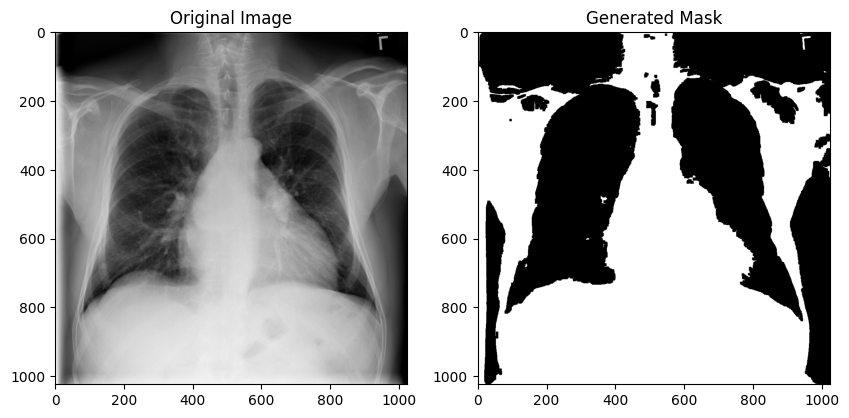

In [8]:
# Pick one sample
sample = image_paths[0]

img = cv2.imread(sample)
mask = create_mask(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(mask, cmap="gray")
plt.title("Generated Mask")

plt.show()
